In [28]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [30]:
# import data
df = pd.read_csv("D:/Elevate labs internship/AI_ML/Task 5/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<Axes: xlabel='target'>

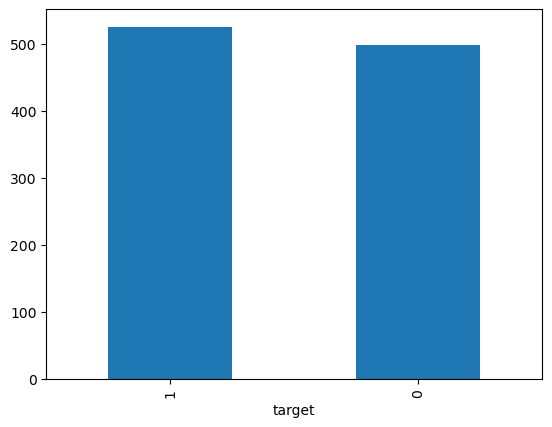

In [32]:
df['target'].value_counts().plot(kind="bar")

In [34]:
#checking null values

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [36]:
# dropping duplicates
df.drop_duplicates(inplace=True)

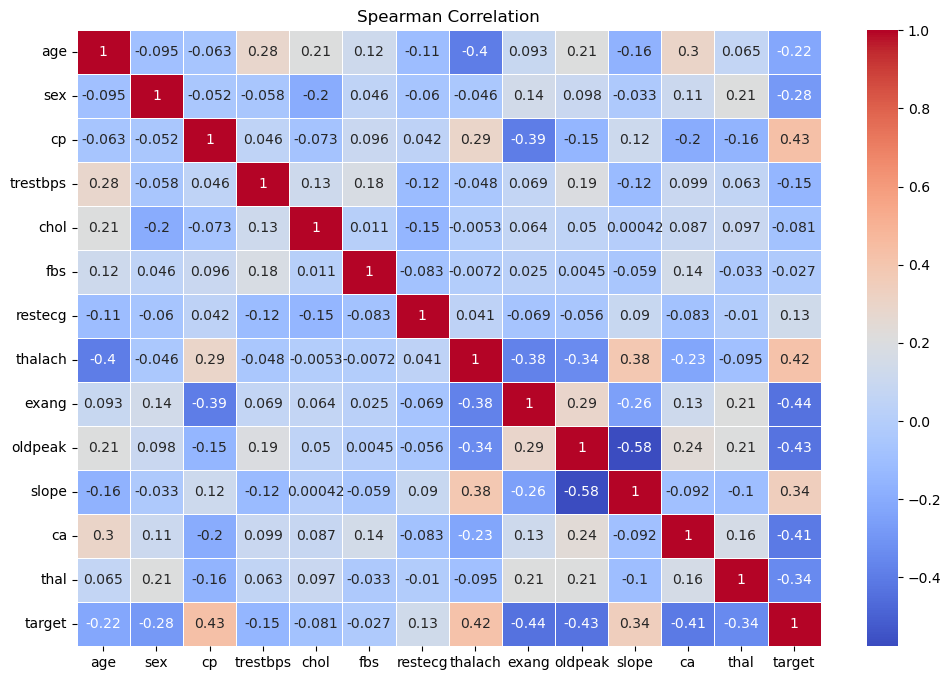

In [38]:
#checking correlation using heat map

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Spearman Correlation")
plt.show()

In [40]:
# Assigning Dependent & Independent variables

X = df.drop(["target"],axis=1)
y = df["target"]

In [42]:
# Normalizing variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.26796589,  0.68265615, -0.93520799, ...,  0.97951442,
         1.27497996,  1.11996657],
       [-0.15726042,  0.68265615, -0.93520799, ..., -2.27118179,
        -0.71491124,  1.11996657],
       [ 1.72473259,  0.68265615, -0.93520799, ..., -2.27118179,
        -0.71491124,  1.11996657],
       ...,
       [-0.26796589,  0.68265615, -0.93520799, ...,  0.97951442,
         0.28003436,  1.11996657],
       [ 0.50697241,  0.68265615,  1.97647049, ...,  0.97951442,
        -0.71491124, -0.51399432],
       [-0.04655495,  0.68265615, -0.93520799, ..., -0.64583368,
         0.28003436,  1.11996657]])

In [44]:
# splitting Data as train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42,stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(211, 13) (211,)
(91, 13) (91,)


### Decision Tree Classifier

In [47]:
# Decision Tree

DT_model =  DecisionTreeClassifier(random_state=10)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [49]:
y_pred = DT_model.predict(X_test)
DT_score = accuracy_score(y_test, y_pred)
print(DT_score)

0.7032967032967034


In [51]:
DT_report = classification_report(y_test, y_pred)
print(DT_report)

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        42
           1       0.74      0.69      0.72        49

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91



### Random Forest Classifier

In [54]:
# Random forest

RF_model = RandomForestClassifier(max_depth=5)
RF_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [56]:
y_pred = RF_model.predict(X_test)
RF_score = accuracy_score(y_test, y_pred)
print(RF_score)

0.7802197802197802


In [58]:
RF_report = classification_report(y_test, y_pred)
print(RF_report)

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        42
           1       0.80      0.80      0.80        49

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



In [82]:
# Decision Tree: Perform 5-fold cross-validation

from sklearn.model_selection import cross_val_score, GridSearchCV
cv_scores_DT = cross_val_score(DT_model, X_train, y_train, cv=5)
print(f"Decision Tree Cross-Validation Scores: {cv_scores_dt}")
print(f"Decision Tree Mean CV Accuracy: {cv_scores_dt.mean():.4f}")


Decision Tree Cross-Validation Scores: [0.90697674 0.85714286 0.5952381  0.78571429 0.64285714]
Decision Tree Mean CV Accuracy: 0.7576


In [84]:
#  Random Forest with Cross-Validation 

# Perform 5-fold cross-validation
cv_scores_rf = cross_val_score(RF_model, X_train, y_train, cv=5)
print(f"Random Forest Cross-Validation Scores: {cv_scores_rf}")
print(f"Random Forest Mean CV Accuracy: {cv_scores_rf.mean():.4f}")


Random Forest Cross-Validation Scores: [0.95348837 0.83333333 0.80952381 0.78571429 0.9047619 ]
Random Forest Mean CV Accuracy: 0.8574
